In [1]:
%run '~/git/Bibliotecas.ipynb'

# 1- Importação de Fertilizantes por Município da Região de Pouso Alegre

In [2]:
i_f_m_r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/i_f_m_r_pa.csv')

In [3]:
i_f_m_r_pa.columns

Index(['CO_MUN', 'NO_MUN', 'NO_MUN_MIN', 'SG_UF', 'CO_ANO', 'CO_MES', 'SH4',
       'CO_PAIS', 'SG_UF_MUN', 'KG_LIQUIDO', 'VL_FOB', 'NO_SH4_POR', 'CO_SH2',
       'NO_SH2_POR'],
      dtype='object')

Correção da Inflação

In [4]:
# Cria manualmente a tabela de correção do dólar
infl_dolar=pd.DataFrame({
 'CO_ANO':np.arange(1997,2025),
 'FATOR':[0.50,0.50,0.51,0.53,0.55,0.56,0.57,0.59,0.61,\
 0.63,0.64,0.67,0.67,0.68,0.70,0.72,0.73,0.74,\
 0.74,0.75,0.77,0.78,0.80,0.81,0.85,0.92,0.96,1.00]})

i_f_m_r_pa=i_f_m_r_pa.merge(infl_dolar)

i_f_m_r_pa['KG_LIQUIDO_real']=i_f_m_r_pa['KG_LIQUIDO']

i_f_m_r_pa['KG_LIQUIDO']=i_f_m_r_pa['KG_LIQUIDO']/i_f_m_r_pa['FATOR']

In [5]:
i_f_m_r_pa[i_f_m_r_pa.duplicated()]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real


In [6]:
i_f_m_r_pa[i_f_m_r_pa.duplicated(subset=['CO_MUN','CO_ANO','CO_MES','SH4','CO_PAIS'])]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real


In [7]:
i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO<=0]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real
351,3152501,POUSO ALEGRE,Pouso Alegre,MG,2009,2,3102,628,MG,0.0,348,"Adubos (fertilizantes) minerais ou químicos, a...",31,Adubos (fertilizantes),0.67,0


Como o registro com 0 KG apresenta também o valor em US$ desprezível, ele será descartado.

In [8]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO>0]

In [9]:
i_f_m_r_pa[i_f_m_r_pa.VL_FOB<=0]

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real


In [10]:
i_f_m_r_pa.head(1)

,CO_MUN,NO_MUN,NO_MUN_MIN,SG_UF,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,KG_LIQUIDO,VL_FOB,NO_SH4_POR,CO_SH2,NO_SH2_POR,FATOR,KG_LIQUIDO_real
0,3125101,EXTREMA,Extrema,MG,2003,9,3105,493,MG,1754.385965,323,"Adubos (fertilizantes) minerais ou químicos, c...",31,Adubos (fertilizantes),0.57,1000


In [11]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.columns[[4,5,1,6,7,9,10]]]

In [12]:
i_f_m_r_pa

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB
0,2003,9,EXTREMA,3105,493,1.754386e+03,323
1,2003,8,EXTREMA,3105,493,1.403509e+02,25
2,2003,3,CONGONHAL,3104,149,4.385965e+06,285075
3,2003,7,CONGONHAL,3104,676,3.340702e+06,199779
4,2003,11,CONGONHAL,3102,676,8.643333e+06,603064
...,...,...,...,...,...,...,...
889,2021,6,POUSO ALEGRE,3105,160,3.546778e+06,1475018
890,2021,11,POUSO ALEGRE,3105,249,9.384706e+03,40612
891,2021,8,POUSO ALEGRE,3104,85,6.490094e+06,1760962
892,2021,10,POUSO ALEGRE,3102,59,6.355552e+06,2324194


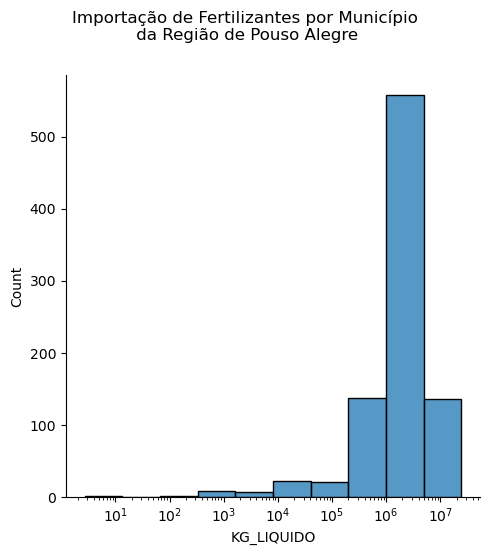

In [13]:
sns.displot(data=i_f_m_r_pa,x='KG_LIQUIDO',log_scale=True,bins=10)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores formam considerados normais.

In [14]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_peso='não')

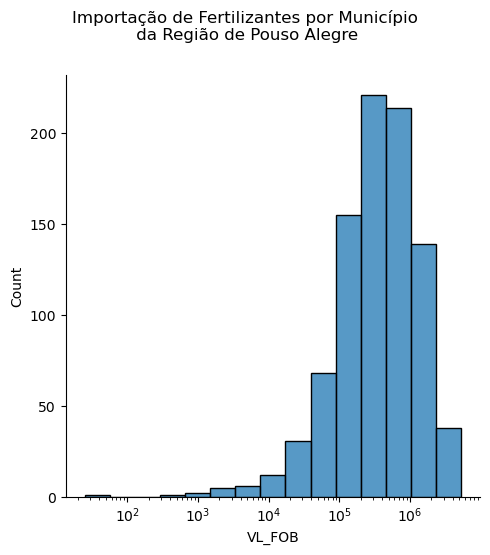

In [15]:
sns.displot(data=i_f_m_r_pa,x='VL_FOB',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores formam considerados normais.

In [16]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_vl='não')

In [17]:
i_f_m_r_pa['US$/KG']=i_f_m_r_pa.VL_FOB/i_f_m_r_pa.KG_LIQUIDO

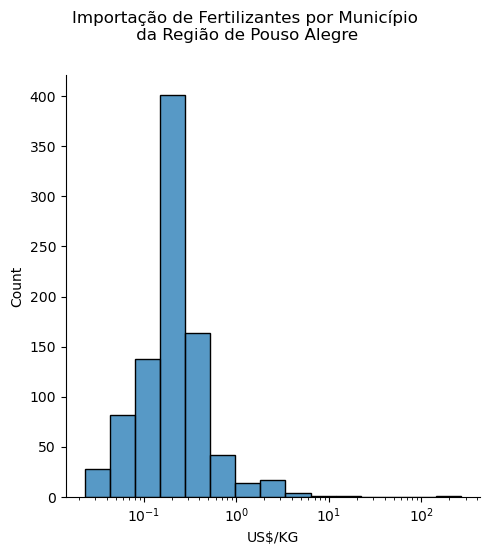

In [18]:
sns.displot(data=i_f_m_r_pa,x='US$/KG',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores acima de 10**0 foram considerados anormais e serão marcados para descarte.

In [19]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_preço='não')

In [20]:
i_f_m_r_pa.loc[i_f_m_r_pa['US$/KG']>10**0,'descarte_preço']='sim'

In [21]:
i_f_m_r_pa[
(i_f_m_r_pa.descarte_peso=='sim')&
(i_f_m_r_pa.descarte_vl=='sim')&
(i_f_m_r_pa.descarte_preço=='sim')
].tipo='descarte_triplo'

In [22]:
i_f_m_r_pa['tipo']='sem_descarte'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_triplo'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_vl_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_peso_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_vl_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_preço'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='descarte_peso'


i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='descarte_vl'

i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='sem_descarte'

w=i_f_m_r_pa.copy()

i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.tipo!='descarte_triplo']

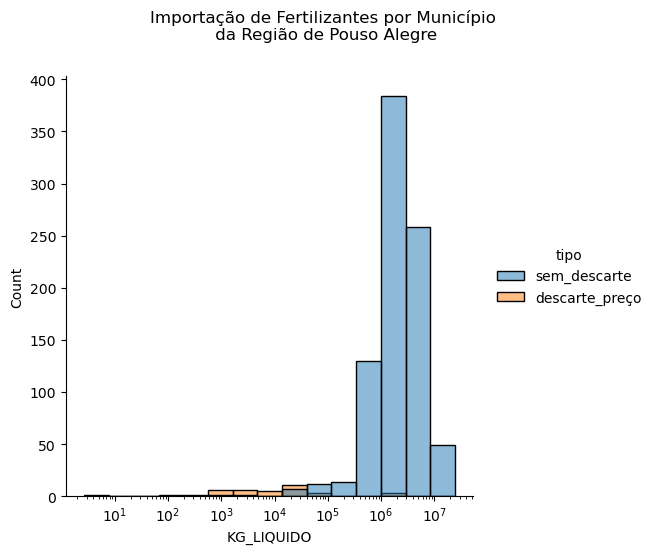

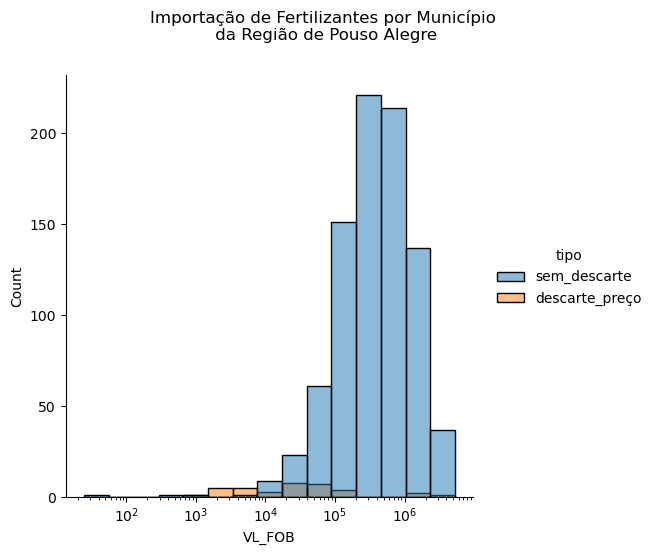

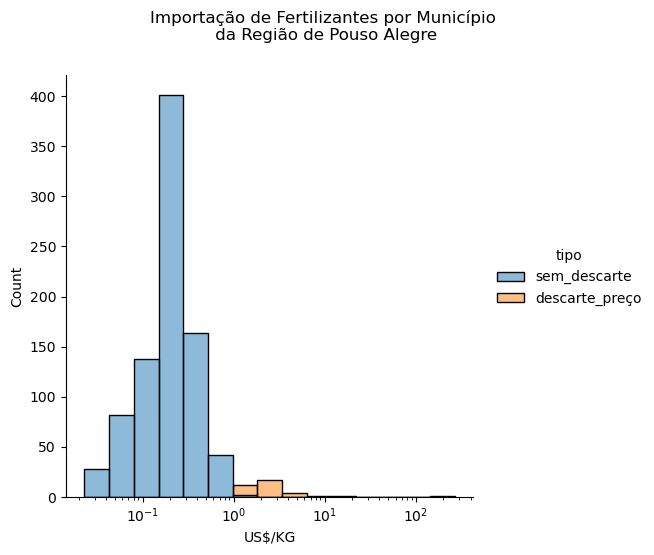

In [23]:
for c in ['KG_LIQUIDO','VL_FOB','US$/KG']:
    sns.displot(data=i_f_m_r_pa,x=c,log_scale=True, hue='tipo', bins=15).fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
    plt.show()

In [24]:
i_f_m_r_pa_sem_descarte=i_f_m_r_pa[i_f_m_r_pa.tipo=='sem_descarte']

In [25]:
i_f_m_r_pa_com_descarte=i_f_m_r_pa[i_f_m_r_pa.tipo!='sem_descarte']

In [26]:
print(f"Os registros com algum tipo de descarte correspondem a {round(100*len(i_f_m_r_pa_com_descarte)/(len(i_f_m_r_pa_com_descarte)+len(i_f_m_r_pa_sem_descarte)))} % do total de registros.")

Os registros com algum tipo de descarte correspondem a 4 % do total de registros.


In [27]:
print(f"Os registros com algum tipo de descarte correspondem a {round(100*(i_f_m_r_pa_com_descarte.KG_LIQUIDO.sum())/((i_f_m_r_pa_com_descarte.KG_LIQUIDO.sum())+(i_f_m_r_pa_sem_descarte.KG_LIQUIDO.sum())))} % do total do peso.")

Os registros com algum tipo de descarte correspondem a 0 % do total do peso.


In [28]:
print(f"Os registros com algum tipo de descarte correspondem a {round(100*(i_f_m_r_pa_com_descarte.VL_FOB.sum())/((i_f_m_r_pa_com_descarte.VL_FOB.sum())+(i_f_m_r_pa_sem_descarte.VL_FOB.sum())))} % do total do valor FOB.")

Os registros com algum tipo de descarte correspondem a 1 % do total do valor FOB.


In [29]:
mean=i_f_m_r_pa_sem_descarte.groupby(['CO_ANO','SH4'])[['KG_LIQUIDO','VL_FOB']].mean().reset_index().rename(columns={'KG_LIQUIDO':'KG_mean','VL_FOB':'VL_mean'})

In [30]:
std=i_f_m_r_pa_sem_descarte.groupby(['CO_ANO','SH4'])[['KG_LIQUIDO','VL_FOB']].std().reset_index().rename(columns={'KG_LIQUIDO':'KG_std','VL_FOB':'VL_std'})

In [31]:
len(i_f_m_r_pa_com_descarte)

36

In [32]:
i_f_m_r_pa_com_descarte_2=i_f_m_r_pa_com_descarte.merge(mean, how='left').merge(std, how='left')
len(i_f_m_r_pa_com_descarte_2)

36

In [33]:
i_f_m_r_pa_com_descarte_2.isna().sum()

CO_ANO            0
CO_MES            0
NO_MUN            0
SH4               0
CO_PAIS           0
KG_LIQUIDO        0
VL_FOB            0
descarte_peso     0
descarte_vl       0
US$/KG            0
descarte_preço    0
tipo              0
KG_mean           8
VL_mean           8
KG_std            9
VL_std            9
dtype: int64

In [34]:
i_f_m_r_pa_com_descarte_2_sem_na=i_f_m_r_pa_com_descarte_2.dropna()
len(i_f_m_r_pa_com_descarte_2_sem_na)

27

In [35]:
i_f_m_r_pa_com_descarte_2_com_na=i_f_m_r_pa_com_descarte_2[i_f_m_r_pa_com_descarte_2.KG_std.isna()]

In [36]:
i_f_m_r_pa_com_descarte_2_sem_na[['KG_LIQUIDO','VL_FOB']].sum()

KG_LIQUIDO    6.102717e+06
VL_FOB        6.949528e+06
dtype: float64

In [37]:
i_f_m_r_pa_com_descarte_2_sem_na['KG_z_score']=(i_f_m_r_pa_com_descarte_2_sem_na.KG_LIQUIDO-i_f_m_r_pa_com_descarte_2_sem_na.KG_mean)/i_f_m_r_pa_com_descarte_2_sem_na.KG_std

In [38]:
i_f_m_r_pa_com_descarte_2_sem_na['VL_z_score']=(i_f_m_r_pa_com_descarte_2_sem_na.VL_FOB-i_f_m_r_pa_com_descarte_2_sem_na.VL_mean)/i_f_m_r_pa_com_descarte_2_sem_na.VL_std

In [39]:
i_f_m_r_pa_com_descarte_2_sem_na.loc[i_f_m_r_pa_com_descarte_2_sem_na.VL_z_score>i_f_m_r_pa_com_descarte_2_sem_na.KG_z_score,'VL_FOB']=\
(i_f_m_r_pa_com_descarte_2_sem_na.KG_z_score *i_f_m_r_pa_com_descarte_2_sem_na.VL_std)+i_f_m_r_pa_com_descarte_2_sem_na.VL_mean

In [40]:
i_f_m_r_pa_com_descarte_2_sem_na.loc[i_f_m_r_pa_com_descarte_2_sem_na.VL_z_score<=i_f_m_r_pa_com_descarte_2_sem_na.KG_z_score,'KG_LIQUIDO']=\
(i_f_m_r_pa_com_descarte_2_sem_na.VL_z_score * i_f_m_r_pa_com_descarte_2_sem_na.KG_std)+i_f_m_r_pa_com_descarte_2_sem_na.KG_mean

In [41]:
i_f_m_r_pa_clean=pd.concat([i_f_m_r_pa_sem_descarte,i_f_m_r_pa_com_descarte_2_sem_na,i_f_m_r_pa_com_descarte_2_com_na])

In [42]:
i_f_m_r_pa_clean['US$/KG']=i_f_m_r_pa_clean.VL_FOB/i_f_m_r_pa_clean.KG_LIQUIDO

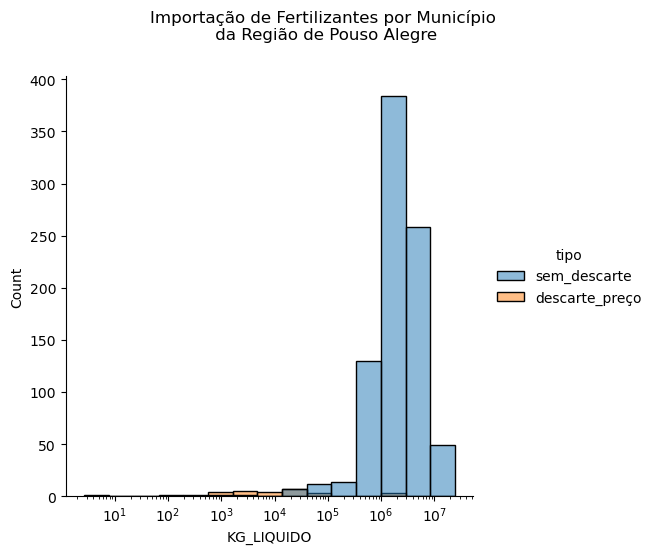

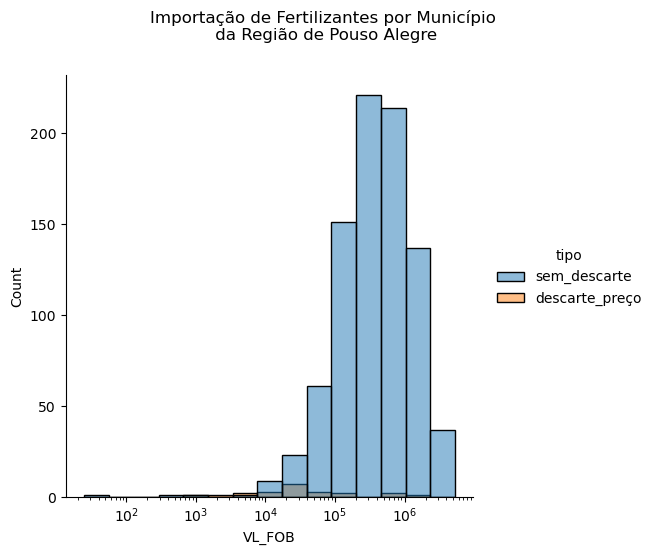

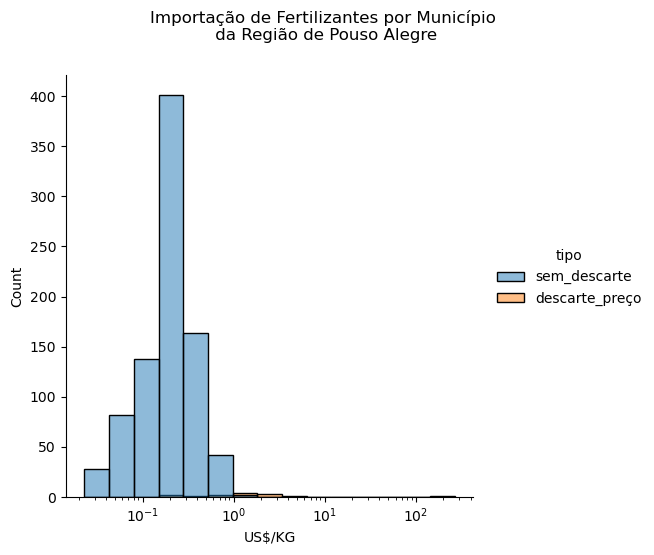

In [43]:
for c in ['KG_LIQUIDO','VL_FOB','US$/KG']:
    sns.displot(data=i_f_m_r_pa_clean,x=c,log_scale=True, hue='tipo', bins=15).fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
    plt.show()

In [44]:
i_f_m_r_pa_clean=i_f_m_r_pa_clean[i_f_m_r_pa_clean['US$/KG']<10**0.1]

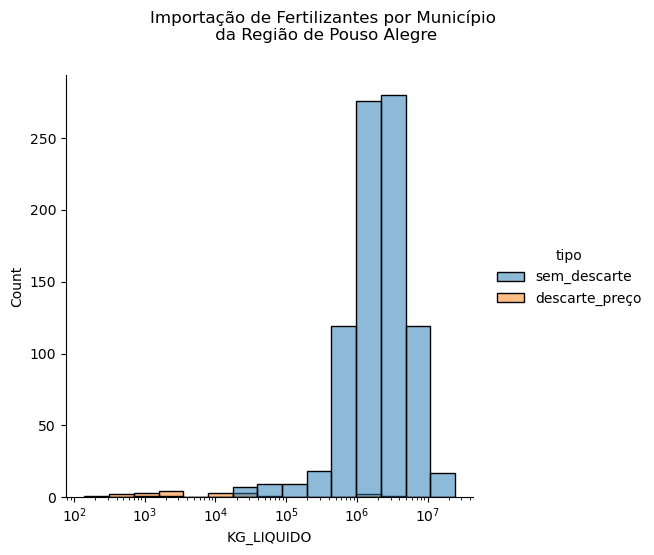

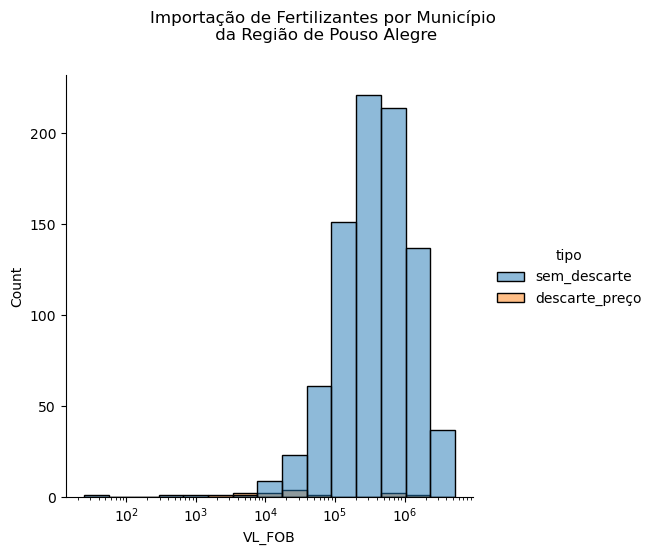

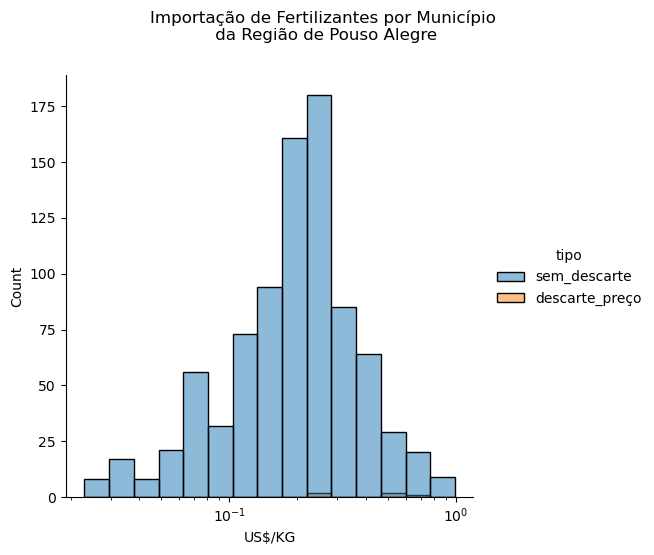

In [45]:
for c in ['KG_LIQUIDO','VL_FOB','US$/KG']:
    sns.displot(data=i_f_m_r_pa_clean,x=c,log_scale=True, bins=15,hue='tipo').fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
    plt.show()

In [46]:
i_f_m_r_pa_clean.head(1)

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB,descarte_peso,descarte_vl,US$/KG,descarte_preço,tipo,KG_mean,VL_mean,KG_std,VL_std,KG_z_score,VL_z_score
0,2003,9,EXTREMA,3105,493,1754.385965,323.0,não,não,0.18411,não,sem_descarte,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
i_f_m_r_pa_clean=i_f_m_r_pa_clean.iloc[:,:7]

Produzindo a matriz esparsa

In [48]:
i_f_m_r_pa_clean.iloc[:,:5]=i_f_m_r_pa_clean.iloc[:,:5].astype('category')

In [49]:
len(i_f_m_r_pa_clean)

884

In [50]:
i_f_m_r_pa_clean.head(1)

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB
0,2003,9,EXTREMA,3105,493,1754.385965,323.0


In [51]:
i_f_m_r_pa_clean_sprx=i_f_m_r_pa_clean.groupby(by=i_f_m_r_pa_clean.columns[:5].tolist())[i_f_m_r_pa_clean.columns[5:].tolist()].sum().reset_index()
len(i_f_m_r_pa_clean_sprx)

458640

In [52]:
i_f_m_r_pa_clean_sprx.head()

,CO_ANO,CO_MES,NO_MUN,SH4,CO_PAIS,KG_LIQUIDO,VL_FOB
0,1997,1,ANDRADAS,3101,23,0.0,0.0
1,1997,1,ANDRADAS,3101,53,0.0,0.0
2,1997,1,ANDRADAS,3101,59,0.0,0.0
3,1997,1,ANDRADAS,3101,63,0.0,0.0
4,1997,1,ANDRADAS,3101,69,0.0,0.0


In [53]:
i_f_m_r_pa_clean_sprx.to_csv('~/git/Importacao-por-SH-e-Municipio/temp/i_f_m_r_pa_clean_sprx.csv',index=True)